In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
#将图画在格里
#matplotlib.use('TkAgg')
import seaborn as sns

## Series

In [3]:
s1 = pd.Series([1,2,3,4,np.nan,5,6,7])
s1

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    5.0
6    6.0
7    7.0
dtype: float64

In [4]:
s1.values

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [5]:
s1.index

RangeIndex(start=0, stop=8, step=1)

In [7]:
s2 = pd.Series([21,23,42,21,23],index = ['Jack','Lucy','Helen','Milky','Jasper'])
s2

Jack      21
Lucy      23
Helen     42
Milky     21
Jasper    23
dtype: int64

In [10]:
s2['Jack']

21

In [11]:
s2.loc['Jack']

21

In [12]:
s2.iloc[2]

42

In [13]:
print(s2.shape)
print(s2.size)

(5,)
5


In [14]:
s2.head(2)

Jack    21
Lucy    23
dtype: int64

In [15]:
s2.describe()

count     5.0
mean     26.0
std       9.0
min      21.0
25%      21.0
50%      23.0
75%      23.0
max      42.0
dtype: float64

In [16]:
s2.sort_values()

Jack      21
Milky     21
Lucy      23
Jasper    23
Helen     42
dtype: int64

In [17]:
# check the people who is older than 22
s2[s2>22]

Lucy      23
Helen     42
Jasper    23
dtype: int64

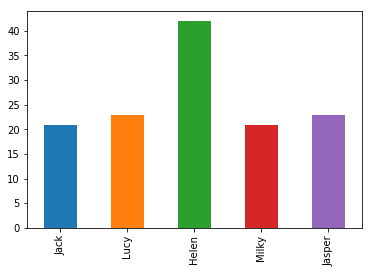

In [18]:
s2.plot.bar()

In [19]:
'Lucy' in s2

True

In [20]:
s2_dict = s2.to_dict()
s2_dict

{'Jack': 21, 'Lucy': 23, 'Helen': 42, 'Milky': 21, 'Jasper': 23}

In [22]:
s2_series = pd.Series(s2_dict)
s2_series

Jack      21
Lucy      23
Helen     42
Milky     21
Jasper    23
dtype: int64

In [23]:
name = ['Jack','Lucy','Helen','Milky','Tom','Jasper','Helen']
s2_new = pd.Series(s2_dict,index=name)
s2_new

Jack      21.0
Lucy      23.0
Helen     42.0
Milky     21.0
Tom        NaN
Jasper    23.0
Helen     42.0
dtype: float64

In [24]:
s2_new.drop_duplicates()

Jack     21.0
Lucy     23.0
Helen    42.0
Tom       NaN
dtype: float64

In [25]:
pd.isnull(s2_new)

Jack      False
Lucy      False
Helen     False
Milky     False
Tom        True
Jasper    False
Helen     False
dtype: bool

### DataFrame
1# How to creat a dataframe? It could be created through passing diffent ways:dictionay of list or ndarrays,2d ndarrays and so on...
2# "因为有了标号，所以好提取"
3# How to create one? 

In [29]:
df = pd.DataFrame({'Student_1':[90,100,95],'Student_2':[60,800,100]},index = ['Monday','Wednesday','Friday'])

In [30]:
df

,Student_1,Student_2
Monday,90,60
Wednesday,100,800
Friday,95,100


In [61]:
df1 = pd.DataFrame([[1,2,3],[4,5,6]],index = ['A','B'],columns = ['C1','C2','C3'])

In [32]:
df1

,C1,C2,C3
A,1,2,3
B,4,5,6


In [33]:
df1.values

array([[1, 2, 3],
       [4, 5, 6]], dtype=int64)

In [34]:
df1.index

Index(['A', 'B'], dtype='object')

In [35]:
df1.columns

Index(['C1', 'C2', 'C3'], dtype='object')

In [36]:
df1.T

,A,B
C1,1,4
C2,2,5
C3,3,6


In [37]:
df1.shape

(2, 3)

In [38]:
df.size

6

### Method

In [40]:
df1.head(1)

,C1,C2,C3
A,1,2,3


In [42]:
df1.tail(1)

,C1,C2,C3
B,4,5,6


In [43]:
df1.describe()

,C1,C2,C3
count,2.00000,2.00000,2.00000
mean,2.50000,3.50000,4.50000
std,2.12132,2.12132,2.12132
min,1.00000,2.00000,3.00000
25%,1.75000,2.75000,3.75000
50%,2.50000,3.50000,4.50000
75%,3.25000,4.25000,5.25000
max,4.00000,5.00000,6.00000


In [45]:
df1.loc['B']

C1    4
C2    5
C3    6
Name: B, dtype: int64

In [47]:
df1.iloc[1]

C1    4
C2    5
C3    6
Name: B, dtype: int64

In [48]:
df1.loc['B'].loc['C2']

5

In [49]:
df1.loc['B','C2']

5

In [50]:
df1.iloc[1,0]

4

In [52]:
df1['C1'].loc['B']

4

In [66]:
df1 + 10*15

,C1,C2,C3
A,151,164,153
B,154,185,156


In [65]:
df1['C2'] = df1.apply(lambda x:x['C2']**2 + 10, axis = 1)
df1

,C1,C2,C3
A,1,14,3
B,4,35,6


In [67]:
df1.assign(C2 = lambda x: x['C2'] ** 2 +10,
          C3 = lambda x: x['C3'] **2 -10) \
        .loc['A'] \
        .max()

206

In [64]:
df1.loc['A'].max()

3

### Index Objects

In [2]:
s = pd.Series([1,2,3,4,5,6], index = pd.date_range('20190206', periods = 6))
s

2019-02-06    1
2019-02-07    2
2019-02-08    3
2019-02-09    4
2019-02-10    5
2019-02-11    6
Freq: D, dtype: int64

In [3]:
s.index

DatetimeIndex(['2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11'],
              dtype='datetime64[ns]', freq='D')

In [4]:
s.index[2]

Timestamp('2019-02-08 00:00:00', freq='D')

In [5]:
s.index[2:]

DatetimeIndex(['2019-02-08', '2019-02-09', '2019-02-10', '2019-02-11'], dtype='datetime64[ns]', freq='D')

### Reindex

In [7]:
a = np.random.randn(1, 4).tolist()
a

[[0.8129456299126853,
  -0.6307116976533759,
  -0.016943005378482527,
  -0.4232375148781855]]

In [8]:
s1 = pd.Series(a[0], index = ['A','B','C','D'])
s1

A    0.812946
B   -0.630712
C   -0.016943
D   -0.423238
dtype: float64

### For series,reindex can be smart

In [9]:
s2 = s1.reindex(['A','B','C','D','E','F','G'])
s2

A    0.812946
B   -0.630712
C   -0.016943
D   -0.423238
E         NaN
F         NaN
G         NaN
dtype: float64

In [10]:
s3 = s2.reindex(['A','B','C','D','E','F','G','H'],fill_value = 0)
s3

A    0.812946
B   -0.630712
C   -0.016943
D   -0.423238
E         NaN
F         NaN
G         NaN
H    0.000000
dtype: float64

### Pandas Reindex

In [11]:
df = pd.DataFrame(np.random.randn(4,4), index = ['r1', 'r2', 'r3', 'r4'], columns = ['c1', 'c2', 'c3', 'c4'])
df

,c1,c2,c3,c4
r1,-0.775504,1.202926,0.558045,-0.963035
r2,0.342105,1.234312,-0.309048,1.026627
r3,0.127366,-0.464465,0.891945,0.451959
r4,-1.735800,0.393899,-0.103498,-0.447446


In [12]:
df.reindex(['r1', 'r2', 'r3', 'r4', 'r5'])

,c1,c2,c3,c4
r1,-0.775504,1.202926,0.558045,-0.963035
r2,0.342105,1.234312,-0.309048,1.026627
r3,0.127366,-0.464465,0.891945,0.451959
r4,-1.735800,0.393899,-0.103498,-0.447446
r5,NaN,NaN,NaN,NaN


In [13]:
df.reindex(columns=['c1', 'c2', 'c3', 'c4', 'c5'])

,c1,c2,c3,c4,c5
r1,-0.775504,1.202926,0.558045,-0.963035,NaN
r2,0.342105,1.234312,-0.309048,1.026627,NaN
r3,0.127366,-0.464465,0.891945,0.451959,NaN
r4,-1.735800,0.393899,-0.103498,-0.447446,NaN


### Drop Series

In [14]:
s1 = pd.Series(np.arange(5), index=[1,2,3,4,5])
s1

1    0
2    1
3    2
4    3
5    4
dtype: int32

In [15]:
s1.drop(4)

1    0
2    1
3    2
5    4
dtype: int32

### Drop DataFrame

In [16]:
# In pandas drop columns and rows are very simple

In [28]:
df1 = pd.DataFrame(np.random.randn(4,5),index = ['r1', 'r2', 'r3', 'r4'], \
                  columns=['c1', 'c2','c3', 'c4', 'c5'])
df1

,c1,c2,c3,c4,c5
r1,0.580849,-0.436799,-1.380515,0.276790,0.597182
r2,-0.118310,-0.227657,-1.868963,-0.926078,-0.520629
r3,-0.510150,1.099344,0.694742,-0.226426,0.808463
r4,-0.406392,-1.441332,0.971844,0.783899,0.798458


In [18]:
df1.drop('r2')

,c1,c2,c3,c4,c5
r1,0.193278,-1.232628,1.043156,-0.100811,-1.146075
r3,0.592416,1.993955,2.214020,-0.364138,-0.540742
r4,-0.270621,-0.530194,0.202830,2.257172,0.590997


In [26]:
df2 = df1.drop('c4', axis = 1)

In [27]:
df2

,c1,c2,c3,c5
r1,-0.416548,-0.630066,1.791386,-0.867671
r2,0.971869,-2.138589,0.853531,1.756237
r3,-0.055200,-0.208593,0.200629,-1.060437
r4,-0.870418,0.501538,-0.406019,0.938265


In [21]:
df1

,c1,c2,c3,c4,c5
r1,0.193278,-1.232628,1.043156,-0.100811,-1.146075
r2,0.747072,-1.169503,0.017974,0.784199,-1.117390
r3,0.592416,1.993955,2.214020,-0.364138,-0.540742
r4,-0.270621,-0.530194,0.202830,2.257172,0.590997


In [22]:
df1.drop('c4', axis = 1,inplace=True)

In [23]:
df1

,c1,c2,c3,c5
r1,0.193278,-1.232628,1.043156,-1.146075
r2,0.747072,-1.169503,0.017974,-1.117390
r3,0.592416,1.993955,2.214020,-0.540742
r4,-0.270621,-0.530194,0.202830,0.590997


### Slice Data
This notebook we are doing series and pandas slicing: One thing is importance When slicing we are creating a View so it will change the origin value

In [30]:
s1 = pd.Series(np.arange(5),index = ['A', 'B', 'C', 'D','E'])
s1

A    0
B    1
C    2
D    3
E    4
dtype: int32

In [32]:
s2 = s1[:3]
s2

A    0
B    1
C    2
dtype: int32

In [33]:
s2['A'] = 2018
s1

A    2018
B       1
C       2
D       3
E       4
dtype: int32

In [34]:
s1[['A', 'B', 'C']]

A    2018
B       1
C       2
dtype: int32

In [36]:
s1[0:3]

A    2018
B       1
C       2
dtype: int32

In [37]:
s1[s1>2]

A    2018
D       3
E       4
dtype: int32

In [38]:
s1[s1>3] = 10
s1

A    10
B     1
C     2
D     3
E    10
dtype: int32

In [41]:
s1[(s1>2) & (s1<5)] = 6
s1

A    10
B     1
C     2
D     6
E    10
dtype: int32

In [42]:
df1 =pd.DataFrame(np.random.randn(4,5),index = ['r1', 'r2', 'r3', 'r4'], columns=['c1', 'c2', 'c3', 'c4', 'c5'])
df1

,c1,c2,c3,c4,c5
r1,0.044565,1.218395,1.219984,-2.385803,1.278608
r2,-0.345787,0.526645,1.247609,-2.078769,-0.022488
r3,0.493985,-1.010405,0.541972,-0.103609,-0.831897
r4,-1.086941,1.361805,0.474784,-1.485212,-0.817508


In [57]:
df1['c1'] #选取c1这一列

r1    0.044565
r2   -0.345787
r3    0.493985
r4   -1.086941
Name: c1, dtype: float64

In [48]:
df1[['c1', 'c2','c3']] # 选取多列

,c1,c2,c3
r1,0.044565,1.218395,1.219984
r2,-0.345787,0.526645,1.247609
r3,0.493985,-1.010405,0.541972
r4,-1.086941,1.361805,0.474784


In [49]:
df1[df1['c2']>0]

,c1,c2,c3,c4,c5
r1,0.044565,1.218395,1.219984,-2.385803,1.278608
r2,-0.345787,0.526645,1.247609,-2.078769,-0.022488
r4,-1.086941,1.361805,0.474784,-1.485212,-0.817508


In [50]:
df1<0

,c1,c2,c3,c4,c5
r1,False,False,False,True,False
r2,True,False,False,True,True
r3,False,True,False,True,True
r4,True,False,False,True,True


In [51]:
df1.ix['r2']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


c1   -0.345787
c2    0.526645
c3    1.247609
c4   -2.078769
c5   -0.022488
Name: r2, dtype: float64

In [53]:
df1

,c1,c2,c3,c4,c5
r1,0.044565,1.218395,1.219984,-2.385803,1.278608
r2,-0.345787,0.526645,1.247609,-2.078769,-0.022488
r3,0.493985,-1.010405,0.541972,-0.103609,-0.831897
r4,-1.086941,1.361805,0.474784,-1.485212,-0.817508


In [52]:
df1.iloc[1] #选取第二行

c1   -0.345787
c2    0.526645
c3    1.247609
c4   -2.078769
c5   -0.022488
Name: r2, dtype: float64

In [56]:
df1.loc['r2'] # 选取第二行

c1   -0.345787
c2    0.526645
c3    1.247609
c4   -2.078769
c5   -0.022488
Name: r2, dtype: float64

In [61]:
df1.iloc[[0,2,3],[0,2]] # 选取【0，2，3】行，【0，2】列

,c1,c3
r1,0.044565,1.219984
r3,0.493985,0.541972
r4,-1.086941,0.474784


In [62]:
df2 = df1.copy()
df2

,c1,c2,c3,c4,c5
r1,0.044565,1.218395,1.219984,-2.385803,1.278608
r2,-0.345787,0.526645,1.247609,-2.078769,-0.022488
r3,0.493985,-1.010405,0.541972,-0.103609,-0.831897
r4,-1.086941,1.361805,0.474784,-1.485212,-0.817508


In [63]:
df2['c6'] = ['one','one','two','three']
df2

,c1,c2,c3,c4,c5,c6
r1,0.044565,1.218395,1.219984,-2.385803,1.278608,one
r2,-0.345787,0.526645,1.247609,-2.078769,-0.022488,one
r3,0.493985,-1.010405,0.541972,-0.103609,-0.831897,two
r4,-1.086941,1.361805,0.474784,-1.485212,-0.817508,three


In [65]:
df2['c6'].isin(['two', 'three'])

r1    False
r2    False
r3     True
r4     True
Name: c6, dtype: bool

In [64]:
df2[df2['c6'].isin(['two', 'three'])]

,c1,c2,c3,c4,c5,c6
r3,0.493985,-1.010405,0.541972,-0.103609,-0.831897,two
r4,-1.086941,1.361805,0.474784,-1.485212,-0.817508,three


### Data Alignment

In [4]:
s1 = pd.Series(np.arange(5), index = ['A', 'B', 'C', 'D', 'E'])
s1

A    0
B    1
C    2
D    3
E    4
dtype: int32

In [5]:
s2 = pd.Series(np.arange(3), index = ['A', 'B', 'C'])
s2

A    0
B    1
C    2
dtype: int32

In [6]:
s1 + s2

A    0.0
B    2.0
C    4.0
D    NaN
E    NaN
dtype: float64

In [7]:
s1 - s2

A    0.0
B    0.0
C    0.0
D    NaN
E    NaN
dtype: float64

In [8]:
df1 =pd.DataFrame(np.random.randn(4,5),index = ['r1', 'r2', 'r3', 'r4'], columns=['c1', 'c2', 'c3', 'c4', 'c5'])
df1

,c1,c2,c3,c4,c5
r1,0.650345,-0.439816,-0.833511,-0.607151,1.857048
r2,0.758584,-0.704028,-0.647426,1.460639,0.508165
r3,0.548395,0.458247,0.229832,0.118715,1.565238
r4,0.619556,0.886394,0.692390,0.513792,-0.398099


In [9]:
df2 =pd.DataFrame(np.random.randn(3,4),index = ['r1', 'r2', 'r3'], columns=['c1', 'c2', 'c3', 'c4'])
df2

,c1,c2,c3,c4
r1,-0.736111,1.675250,-0.701526,1.460602
r2,-0.108438,-1.933532,-0.288294,-0.857751
r3,-0.730949,-1.567598,0.066692,-0.614608


In [10]:
df1 + df2

,c1,c2,c3,c4,c5
r1,-0.085766,1.235434,-1.535038,0.853450,NaN
r2,0.650145,-2.637561,-0.935721,0.602888,NaN
r3,-0.182555,-1.109351,0.296524,-0.495893,NaN
r4,NaN,NaN,NaN,NaN,NaN


In [13]:
df1.add(df2, fill_value=100) # use fill_value + df1

,c1,c2,c3,c4,c5
r1,-0.085766,1.235434,-1.535038,0.853450,101.857048
r2,0.650145,-2.637561,-0.935721,0.602888,100.508165
r3,-0.182555,-1.109351,0.296524,-0.495893,101.565238
r4,100.619556,100.886394,100.692390,100.513792,99.601901


In [16]:
s3 = df1.iloc[0] # select first row
s3

c1    0.650345
c2   -0.439816
c3   -0.833511
c4   -0.607151
c5    1.857048
Name: r1, dtype: float64

In [17]:
df2 - s3

,c1,c2,c3,c4,c5
r1,-1.386456,2.115066,0.131985,2.067753,NaN
r2,-0.758783,-1.493717,0.545217,-0.250600,NaN
r3,-1.381295,-1.127782,0.900204,-0.007457,NaN


### Rank and Sort

In [18]:
s1 = pd.Series(np.arange(5), index = ['B',  'C', 'D', 'A', 'E'])
s1

B    0
C    1
D    2
A    3
E    4
dtype: int32

In [19]:
s1.sort_index()

A    3
B    0
C    1
D    2
E    4
dtype: int32

In [20]:
s1.sort_values(ascending=False)

E    4
A    3
D    2
C    1
B    0
dtype: int32

In [21]:
s2 = pd.Series(np.random.randn(6))
s2

0   -0.549682
1   -0.312420
2    1.007835
3    0.350306
4   -0.200094
5    2.356582
dtype: float64

In [22]:
s2.sort_values()

0   -0.549682
1   -0.312420
4   -0.200094
3    0.350306
2    1.007835
5    2.356582
dtype: float64

In [23]:
s2.rank()

0    1.0
1    2.0
2    5.0
3    4.0
4    3.0
5    6.0
dtype: float64